# Problem Statement :- 
                         Task 1: Prepare a complete data analysis report on the given the data set.
                         Task 2: Build the model that can accurately predict the performance of the students.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 400) # column width

#  Description

The objective of this project is to build a model that can accurately predicts the performance of students.

The data includes 4 categorical features, 1 numerical feature, and the target class.

Categorical features:
- native_teacher
- instructor
- course
- semester

Numerical features:
- class_size

Target variable:
- performance

#  Preprocessing

### Data exploration
Load data

In [2]:
df = pd.read_csv('tae.csv', names=['native_teacher', 'instructor', 'course', 'semester', 'class_size', 'performance'])
df.head()

,native_teacher,instructor,course,semester,class_size,performance
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


Because the distribution of the target variable is balanced, we will use accuracy as an evaluation metric and there is no need for oversampling.

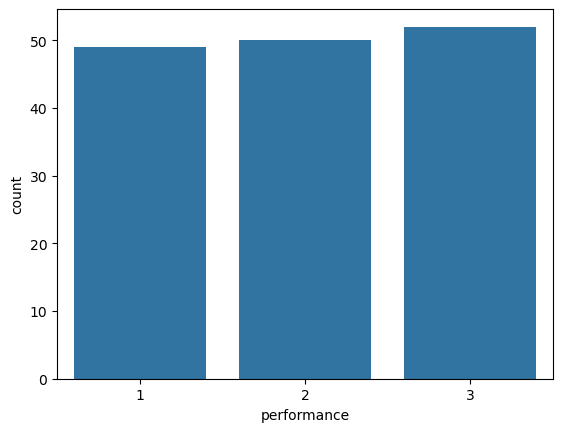

In [3]:
df_performance = df.groupby('performance')[['native_teacher']].count().reset_index().rename(columns={'native_teacher': 'count'})
sns.barplot(x='performance', y='count', data=df_performance, color='tab:blue')
plt.show()

### Feature Engineering

Apply one-hot encoding to categorical features

In [4]:
df = pd.get_dummies(df, columns=['native_teacher', 'instructor', 'course', 'semester'])
df.head()

,class_size,performance,native_teacher_1,native_teacher_2,instructor_1,instructor_2,instructor_3,instructor_4,instructor_5,instructor_6,instructor_7,instructor_8,instructor_9,instructor_10,instructor_11,instructor_12,instructor_13,instructor_14,instructor_15,instructor_16,instructor_17,instructor_18,instructor_19,instructor_20,instructor_21,instructor_22,instructor_23,instructor_24,instructor_25,course_1,course_2,course_3,course_4,course_5,course_6,course_7,course_8,course_9,course_10,course_11,course_12,course_13,course_14,course_15,course_16,course_17,course_18,course_19,course_20,course_21,course_22,course_23,course_24,course_25,course_26,semester_1,semester_2
0,19,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,49,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,33,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,55,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(151, 57)

Build training and testing dataset

In [6]:
features = [col for col in df.columns if col not in ['performance']]
df_train, df_test = train_test_split(df, random_state=42)

X_train = df_train[features]
y_train = df_train['performance']

X_test = df_test[features]
y_test = df_test['performance']

model_scores = []

Set up

In [7]:
# global variable to keep track the scores of models
model_scores = []

def select_best_model(model_name, model, model_params):
    """
    Select the best scaler and parameters for the given model
    """
    scalers = [
        ('No scaler', None),
        ('StandardScaler', StandardScaler()),
        ('Normalizer', Normalizer()),
        ('MinMaxScaler', MinMaxScaler()),
        ('RobustScaler', RobustScaler())
    ]
    scaler_and_scores = []
    for scaler_name, scaler in scalers:
        steps = [('scaler', scaler), ('model', model)] if scaler else [('model', model)]
        pipe = Pipeline(steps)
        grid = GridSearchCV(pipe, model_params)
        grid.fit(X_train, y_train)
        score = grid.score(X_test, y_test)
        scaler_and_scores.append((scaler_name, score, grid.best_params_, grid))
        
    scaler_and_scores.sort(key=lambda item: -item[1])
    best_score = scaler_and_scores[0][1]
    model_scores.append((model_name, best_score))
    
    score_df = pd.DataFrame(scaler_and_scores, columns=['scaler', 'accuracy', 'best_params', 'model'])
    return score_df

# Model: Logistic Regression

In [8]:
model = LogisticRegression()
params = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100]
}

score_df = select_best_model('Logistic Regression', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,StandardScaler,0.631579,"{'model__C': 0.1, 'model__penalty': 'none'}"
1,RobustScaler,0.631579,"{'model__C': 0.1, 'model__penalty': 'none'}"
2,MinMaxScaler,0.605263,"{'model__C': 10, 'model__penalty': 'l2'}"
3,No scaler,0.552632,"{'model__C': 1, 'model__penalty': 'l2'}"
4,Normalizer,0.552632,"{'model__C': 0.1, 'model__penalty': 'none'}"


# Model: Neural Network

In [9]:
model = MLPClassifier()
params = {
    'model__hidden_layer_sizes': [(100), (100, 100), (100, 100, 100)],
    'model__activation': ['relu', 'identity', 'tanh', 'logistic'],
#     'model__solver': ['lbfgs', 'sgd', 'adam']
}
score_df = select_best_model('Neural Network', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,MinMaxScaler,0.710526,"{'model__activation': 'relu', 'model__hidden_layer_sizes': (100, 100)}"
1,StandardScaler,0.684211,"{'model__activation': 'tanh', 'model__hidden_layer_sizes': (100, 100, 100)}"
2,RobustScaler,0.684211,"{'model__activation': 'relu', 'model__hidden_layer_sizes': (100, 100)}"
3,No scaler,0.605263,"{'model__activation': 'relu', 'model__hidden_layer_sizes': (100, 100)}"
4,Normalizer,0.552632,"{'model__activation': 'identity', 'model__hidden_layer_sizes': (100, 100, 100)}"


# Model: Random Forest

In [10]:
model = RandomForestClassifier()
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__criterion': ['gini', 'entropy']
}

score_df = select_best_model('Random Forest', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,RobustScaler,0.710526,"{'model__criterion': 'gini', 'model__n_estimators': 200}"
1,StandardScaler,0.684211,"{'model__criterion': 'entropy', 'model__n_estimators': 200}"
2,MinMaxScaler,0.684211,"{'model__criterion': 'gini', 'model__n_estimators': 100}"
3,Normalizer,0.657895,"{'model__criterion': 'entropy', 'model__n_estimators': 100}"
4,No scaler,0.605263,"{'model__criterion': 'gini', 'model__n_estimators': 200}"


# Model: Decision Tree

In [11]:
model = DecisionTreeClassifier()
params = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random']
}

score_df = select_best_model('Decision Tree', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,No scaler,0.736842,"{'model__criterion': 'entropy', 'model__splitter': 'random'}"
1,StandardScaler,0.710526,"{'model__criterion': 'gini', 'model__splitter': 'random'}"
2,Normalizer,0.710526,"{'model__criterion': 'gini', 'model__splitter': 'random'}"
3,MinMaxScaler,0.657895,"{'model__criterion': 'entropy', 'model__splitter': 'random'}"
4,RobustScaler,0.657895,"{'model__criterion': 'gini', 'model__splitter': 'random'}"


# Model: Gradient Boosting

In [12]:
model = GradientBoostingClassifier()
params = {
    'model__loss': ['deviance', 'exponential'],
    'model__n_estimators': [10, 100, 200, 500]
}

score_df = select_best_model('Gradient Boosting', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,StandardScaler,0.736842,"{'model__loss': 'deviance', 'model__n_estimators': 500}"
1,MinMaxScaler,0.736842,"{'model__loss': 'deviance', 'model__n_estimators': 500}"
2,No scaler,0.710526,"{'model__loss': 'deviance', 'model__n_estimators': 500}"
3,RobustScaler,0.710526,"{'model__loss': 'deviance', 'model__n_estimators': 500}"
4,Normalizer,0.657895,"{'model__loss': 'deviance', 'model__n_estimators': 500}"


# Model: Linear Discriminant Analysis

In [ ]:
model = LinearDiscriminantAnalysis()
params = {
    'model__solver': ['svd', 'lsqr', 'eigen']
}

score_df = select_best_model('LDA', model, params)
score_df[score_df.columns[:-1]]

# Model: SVM

In [19]:
model = SVC()
params = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__degree': [1, 3, 5, 10, 20]
}

score_df = select_best_model('SVM', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,StandardScaler,0.657895,"{'model__C': 100, 'model__degree': 1, 'model__kernel': 'rbf'}"
1,Normalizer,0.631579,"{'model__C': 100, 'model__degree': 20, 'model__kernel': 'poly'}"
2,MinMaxScaler,0.631579,"{'model__C': 100, 'model__degree': 10, 'model__kernel': 'poly'}"
3,RobustScaler,0.631579,"{'model__C': 100, 'model__degree': 5, 'model__kernel': 'poly'}"
4,No scaler,0.605263,"{'model__C': 10, 'model__degree': 1, 'model__kernel': 'linear'}"


# Conclusion

In [21]:
model_scores.sort(key=lambda item: -item[1])
model_df = pd.DataFrame(model_scores, columns=['model', 'accuracy'])
model_df

,model,accuracy
0,Decision Tree,0.736842
1,Gradient Boosting,0.736842
2,Neural Network,0.710526
3,Random Forest,0.710526
4,SVM,0.657895
5,SVM,0.657895
6,SVM,0.657895
7,Logistic Regression,0.631579
8,LDA,0.605263
